In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings        
warnings.filterwarnings("ignore")
import seaborn as sn
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import plotly.express as px

In [2]:
#Importing the dataset
df=pd.read_csv("train.csv")
df.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [3]:
## Basic EDA

In [4]:
df.shape

(3000888, 6)

In [5]:
df.isna().value_counts()

id     date   store_nbr  family  sales  onpromotion
False  False  False      False   False  False          3000888
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [7]:
df.describe().T

count          mean            std  min        25%  \
id           3000888.0  1.500444e+06  866281.891642  0.0  750221.75   
store_nbr    3000888.0  2.750000e+01      15.585787  1.0      14.00   
sales        3000888.0  3.577757e+02    1101.997721  0.0       0.00   
onpromotion  3000888.0  2.602770e+00      12.218882  0.0       0.00   

                   50%           75%        max  
id           1500443.5  2.250665e+06  3000887.0  
store_nbr         27.5  4.100000e+01       54.0  
sales             11.0  1.958473e+02   124717.0  
onpromotion        0.0  0.000000e+00      741.0

In [8]:
df.family.value_counts().count()

33

In [9]:
df.duplicated().sum()

0

In [10]:
df=pd.read_csv("train.csv")
df.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [11]:
df=df.iloc[:,1:]

In [12]:
df.head()

date  store_nbr      family  sales  onpromotion
0  2013-01-01          1  AUTOMOTIVE    0.0            0
1  2013-01-01          1   BABY CARE    0.0            0
2  2013-01-01          1      BEAUTY    0.0            0
3  2013-01-01          1   BEVERAGES    0.0            0
4  2013-01-01          1       BOOKS    0.0            0

# EDA

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df.head()

date  store_nbr      family  sales  onpromotion
0 2013-01-01          1  AUTOMOTIVE    0.0            0
1 2013-01-01          1   BABY CARE    0.0            0
2 2013-01-01          1      BEAUTY    0.0            0
3 2013-01-01          1   BEVERAGES    0.0            0
4 2013-01-01          1       BOOKS    0.0            0

# Yearly Data

In [15]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

            store_nbr         sales  onpromotion
date                                            
2013-12-31   17837820  1.404190e+08            0
2014-12-31   17837820  2.094742e+08       459114
2015-12-31   17837820  2.408801e+08      1087275
2016-12-31   17886825  2.886545e+08      3514584
2017-12-31   11124135  1.942171e+08      2749649


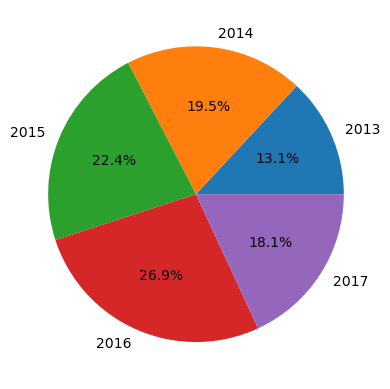

In [16]:
yearly_data = df.resample('y').sum()

# Print the resampled data
print(yearly_data)
labels=[2013,2014,2015,2016,2017]
plt.pie(yearly_data["sales"],labels=labels,autopct='%1.1f%%')
plt.show()

<Axes: >

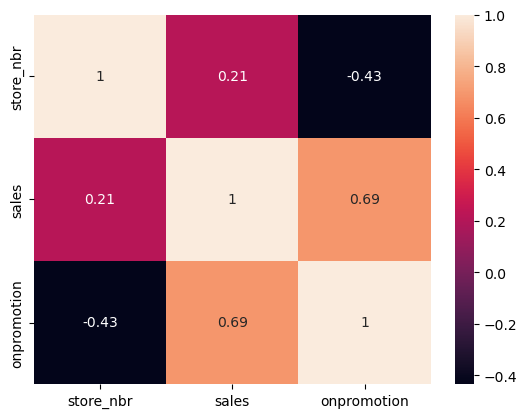

In [17]:
sn.heatmap(yearly_data.corr(),annot=True)

from yearly data,we conclude that a sales in a year 2016 is higher than other consecutive years.i.e. 26.9%
and sales in year 2013 is lower than other beacuse of low amount promotions. 
  3. in 2017 sales are less beacused of some national issues.

            store_nbr         sales  onpromotion
date                                            
2013-12-31   17837820  1.404190e+08            0
2014-12-31   17837820  2.094742e+08       459114
2015-12-31   17837820  2.408801e+08      1087275
2016-12-31   17886825  2.886545e+08      3514584
2017-12-31   11124135  1.942171e+08      2749649


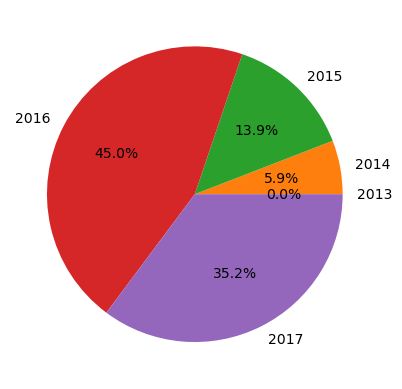

In [18]:
print(yearly_data)
labels=[2013,2014,2015,2016,2017]
plt.pie(yearly_data["onpromotion"],labels=labels,autopct='%1.1f%%')
plt.show()

### From above, we conculde that 2013 promotion is almost consecutive 0% and promotion in 2016 is upto 45% 

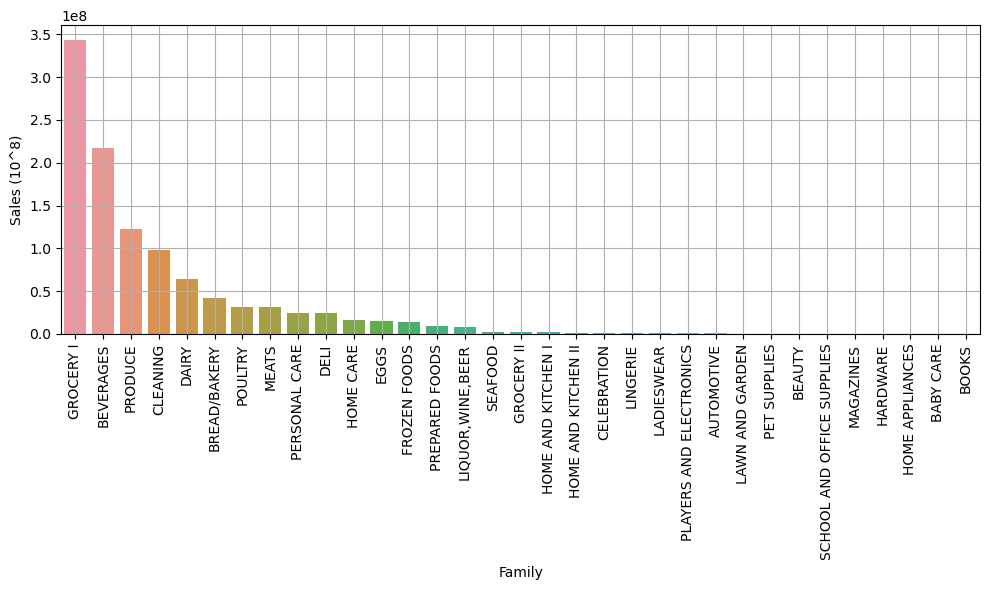

In [19]:
plt.rcParams['figure.figsize'] = [10,6]
plot1 = sn.barplot(data = df.groupby('family').sum().reset_index().
                   sort_values(by = 'sales',ascending=False),x='family',y = 'sales',)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, fontdict={'verticalalignment':'top'})
plt.xlabel('Family')
plt.ylabel('Sales (10^8)')
# plot.bar_label(plot.containers[0])
# plot.set_yscale(value = 'asinh')
plt.grid()
plt.tight_layout()
plt.show()

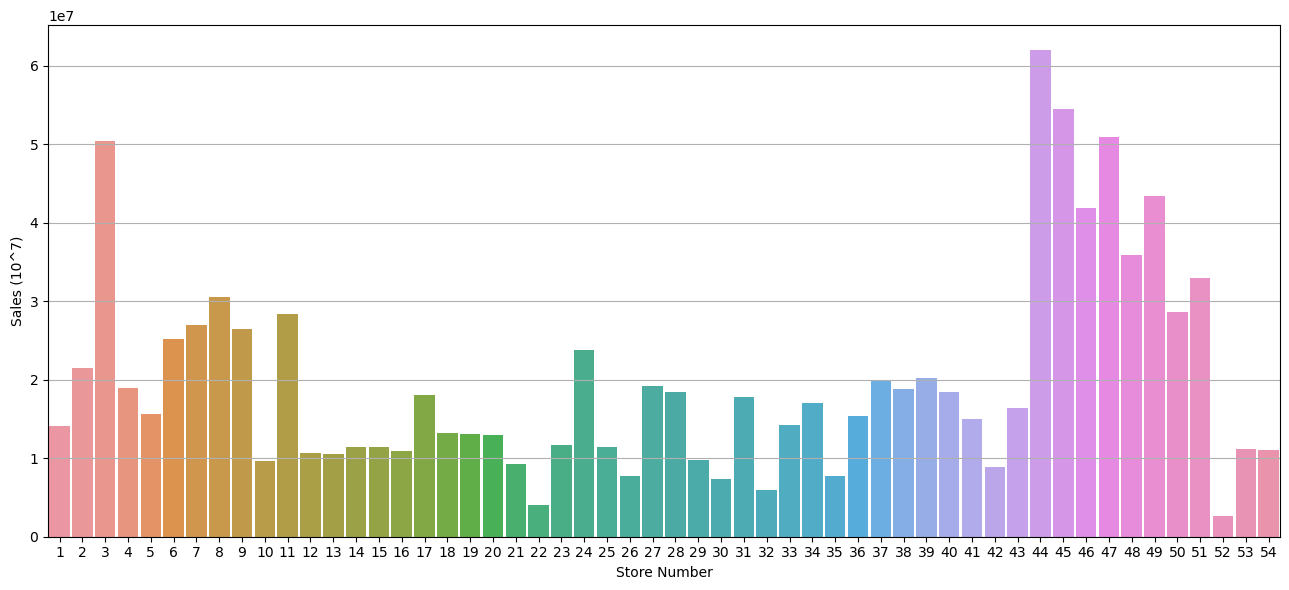

In [20]:
plt.rcParams['figure.figsize'] = [13,6]
plot2 = sn.barplot(data = df.groupby('store_nbr').sum().reset_index(),x='store_nbr',y = 'sales',width = 0.9)
plot2.set_xticklabels(plot2.get_xticklabels(), fontdict={'verticalalignment':'top'})
plt.xlabel('Store Number')
plt.ylabel('Sales (10^7)')
# plot.bar_label(plot.containers[0])
# plot.set_yscale(value = 'asinh')
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

In [21]:
fig=px.bar(yearly_data, x="sales", y="onpromotion", barmode="group")
fig.update_traces(texttemplate=labels, textposition='outside')

In [22]:
yearly_data_ri=yearly_data.reset_index()

In [23]:
px.line(yearly_data_ri, x='date', y='sales', title='yearly Data Forecast')

From above line chart, sales is linearly corelated to year. when we go forward to next year the sales is increases but after 2017 sales is slightly downstairs beacuse we have data till only august month.

In [24]:
px.line(yearly_data_ri, x='date', y='onpromotion', title='yearly Data Forecast')

# Monthly data

In [25]:
monthly_data = df.resample('M').sum()
monthly_data.head()

store_nbr         sales  onpromotion
date                                            
2013-01-31    1519155  1.032762e+07            0
2013-02-28    1372140  9.658960e+06            0
2013-03-31    1519155  1.142850e+07            0
2013-04-30    1470150  1.099346e+07            0
2013-05-31    1519155  1.159770e+07            0

<Axes: >

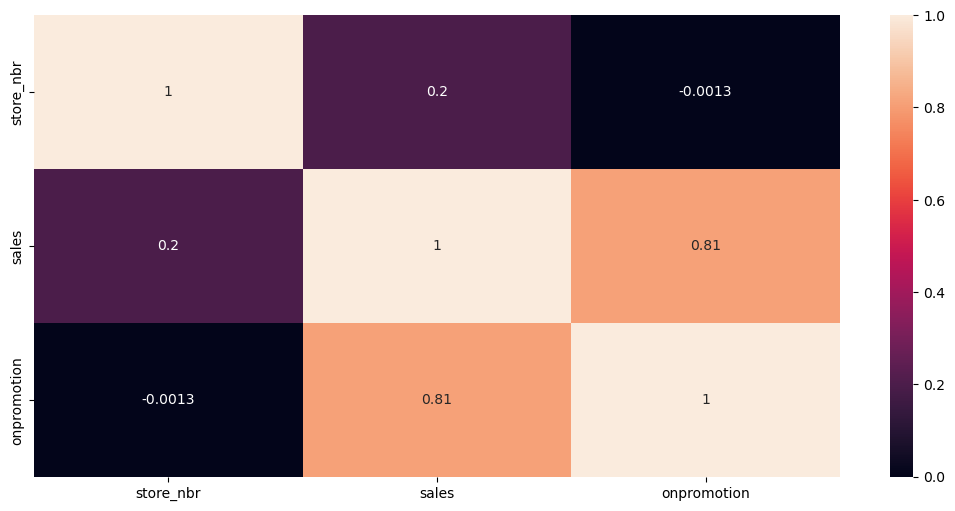

In [26]:
sn.heatmap(monthly_data.corr(),annot=True)

In [27]:
monthly_data_ri=monthly_data.reset_index()

In [28]:
px.line(monthly_data_ri, x='date', y='sales', title='Monthly Data Forecast')

In [29]:
px.line(monthly_data_ri, x='date', y='onpromotion', title='Monthly Data Forecast')

In [30]:
px.scatter(monthly_data_ri, x='date', y='sales', title='Monthly Time Series')

In [31]:
px.scatter_matrix(monthly_data_ri, dimensions=["sales","onpromotion","store_nbr"])

In [32]:
df_sorted_md = monthly_data_ri.sort_values(by='sales', ascending=False)
df_sorted_md['Month'] = df_sorted_md['date'].dt.strftime('%B')

In [33]:
df_sorted_md=df_sorted_md.groupby(["Month"]).sum()

In [34]:
df_sorted_md=df_sorted_md.reset_index()

In [35]:
df_sorted_md

Month  store_nbr         sales  onpromotion
0       April    7350750  9.066812e+07       642668
1      August    6811695  8.347238e+07       580424
2    December    5880600  9.702784e+07       742398
3    February    6909705  8.063723e+07       521539
4     January    7595775  9.444215e+07       536154
5        July    7595775  1.033631e+08       856140
6        June    7350750  9.451670e+07       799321
7       March    7595775  9.722849e+07       563441
8         May    7595775  9.439914e+07       859122
9    November    5880600  8.033579e+07       637889
10    October    6076620  8.008038e+07       562633
11  September    5880600  7.747368e+07       508893

In [36]:
px.line(df_sorted_md, x='Month', y='sales', title='Monthly Time Series')

In [37]:
months=["jan","feb","mar","apr","may","jun","july","August","sept","oct","nov","dec"]
fig=px.bar(df_sorted_md, x="sales", y="onpromotion", barmode="group")
fig.update_traces(texttemplate=months, textposition='outside')
fig

In [38]:
 px.pie(df_sorted_md, values='sales', names="Month")

# Weekly data

In [39]:
weekly_data= df.resample('D').sum()
weekly_data=weekly_data.reset_index()

In [40]:
weekly_data

date  store_nbr          sales  onpromotion
0    2013-01-01      49005    2511.618999            0
1    2013-01-02      49005  496092.417944            0
2    2013-01-03      49005  361461.231124            0
3    2013-01-04      49005  354459.677093            0
4    2013-01-05      49005  477350.121229            0
...         ...        ...            ...          ...
1683 2017-08-11      49005  826373.722022        14179
1684 2017-08-12      49005  792630.535079         8312
1685 2017-08-13      49005  865639.677471         9283
1686 2017-08-14      49005  760922.406081         8043
1687 2017-08-15      49005  762661.935939        10605

[1688 rows x 4 columns]

In [41]:
weekly_data['Days'] = weekly_data['date'].dt.strftime('%A')

In [42]:
weekly_data_f=weekly_data.groupby(["Days"]).sum()

In [43]:
weekly_data=weekly_data_f.reset_index()

<Axes: >

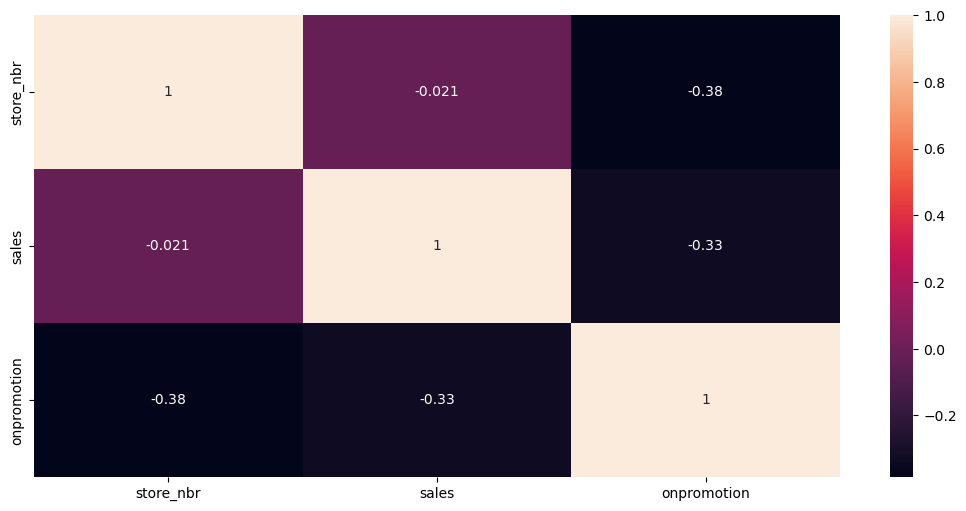

In [44]:
sn.heatmap(weekly_data.corr(),annot=True)

In [45]:
 px.pie(weekly_data, values='sales', names="Days")

In [46]:
 px.pie(weekly_data, values='onpromotion', names="Days")

In [47]:
px.scatter_matrix(weekly_data, dimensions=["sales","onpromotion","store_nbr"])

In [48]:
px.line(weekly_data, x='Days', y='sales', title='weekly Time Series')

In [49]:
px.line(weekly_data, x='Days', y='onpromotion', title='weekly Time Series')

In [50]:
df.head()

store_nbr      family  sales  onpromotion
date                                                 
2013-01-01          1  AUTOMOTIVE    0.0            0
2013-01-01          1   BABY CARE    0.0            0
2013-01-01          1      BEAUTY    0.0            0
2013-01-01          1   BEVERAGES    0.0            0
2013-01-01          1       BOOKS    0.0            0

In [54]:
df=pd.read_csv("train.csv")

In [55]:
df=df.iloc[:,2:]

In [56]:
df.head()

store_nbr      family  sales  onpromotion
0          1  AUTOMOTIVE    0.0            0
1          1   BABY CARE    0.0            0
2          1      BEAUTY    0.0            0
3          1   BEVERAGES    0.0            0
4          1       BOOKS    0.0            0

In [57]:
df_family=df.groupby(["family"]).sum()

In [58]:
df_sorted = df_family.sort_values(by='sales', ascending=False)

In [59]:
df_sorted=df_sorted.reset_index()

In [60]:
df_family_top10=df_sorted.head(10)
df_family_top10

family  store_nbr         sales  onpromotion
0      GROCERY I    2500740  3.434627e+08      1914801
1      BEVERAGES    2500740  2.169545e+08       906958
2        PRODUCE    2500740  1.227047e+08      1117921
3       CLEANING    2500740  9.752129e+07       661157
4          DAIRY    2500740  6.448771e+07       728707
5   BREAD/BAKERY    2500740  4.213395e+07       331289
6        POULTRY    2500740  3.187600e+07       226421
7          MEATS    2500740  3.108647e+07       304028
8  PERSONAL CARE    2500740  2.459205e+07       246928
9           DELI    2500740  2.411032e+07       583316

In [61]:
 px.pie(df_family_top10, values='sales', names="family")

In [62]:
px.histogram(data_frame=df_family_top10,x="family",y="sales")

In [63]:
#low10 products sales
df_family_low10=df_sorted.tail(10)
df_family_low10

family  store_nbr     sales  onpromotion
23                  AUTOMOTIVE    2500740  554822.0         4783
24             LAWN AND GARDEN    2500740  548842.0        11208
25                PET SUPPLIES    2500740  356584.0         3250
26                      BEAUTY    2500740  337893.0        13483
27  SCHOOL AND OFFICE SUPPLIES    2500740  269316.0        14565
28                   MAGAZINES    2500740  266359.0          297
29                    HARDWARE    2500740  103470.0          163
30             HOME APPLIANCES    2500740   41601.0           58
31                   BABY CARE    2500740   10051.0           53
32                       BOOKS    2500740    6438.0            0

In [64]:
 px.pie(df_family_low10, values='sales', names="family")

In [65]:
df.store_nbr.value_counts().count()

54

In [66]:
df_store_nbr=df.groupby(["store_nbr"]).sum()

In [67]:
df_store_nbr=df_store_nbr.reset_index()

In [68]:
df_storenbr_sorted=df_store_nbr.sort_values(by="sales",ascending=False)

In [69]:
df_storenbr_top10=df_storenbr_sorted.head(10)
df_storenbr_top10

store_nbr         sales  onpromotion
43         44  6.208755e+07       192449
44         45  5.449801e+07       191503
46         47  5.094831e+07       192725
2           3  5.048191e+07       177075
48         49  4.342010e+07       184736
45         46  4.189606e+07       190697
47         48  3.593313e+07       185566
50         51  3.291149e+07       162576
7           8  3.049429e+07       169671
49         50  2.865302e+07       174115

In [70]:
 ##Top 10 stores
px.pie(df_storenbr_top10, values='sales', names="store_nbr")

In [71]:
px.histogram(data_frame=df_storenbr_top10,x="store_nbr",y="sales")

In [72]:
#lower 10 store
df_storenbr_low10=df_storenbr_sorted.tail(10)

In [73]:
df_storenbr_low10

store_nbr         sales  onpromotion
28         29  9.725158e+06       153632
9          10  9.613906e+06       103223
20         21  9.255506e+06       144062
41         42  8.945768e+06       124670
25         26  7.755122e+06       111498
34         35  7.676679e+06       110104
29         30  7.382074e+06       103096
31         32  5.951796e+06        89932
21         22  4.090202e+06        99543
51         52  2.696170e+06        30814

In [74]:
px.histogram(data_frame=df_storenbr_low10,x="store_nbr",y="sales")

In [75]:
px.pie(df_storenbr_low10, values='sales', names="store_nbr")

# Seasonality

In [76]:
df.head()

store_nbr      family  sales  onpromotion
0          1  AUTOMOTIVE    0.0            0
1          1   BABY CARE    0.0            0
2          1      BEAUTY    0.0            0
3          1   BEVERAGES    0.0            0
4          1       BOOKS    0.0            0

# weekly smoothing

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [81]:
df=pd.read_csv("train.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [82]:
df.head()

id  store_nbr      family  sales  onpromotion
date                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0
2013-01-01   1          1   BABY CARE    0.0            0
2013-01-01   2          1      BEAUTY    0.0            0
2013-01-01   3          1   BEVERAGES    0.0            0
2013-01-01   4          1       BOOKS    0.0            0

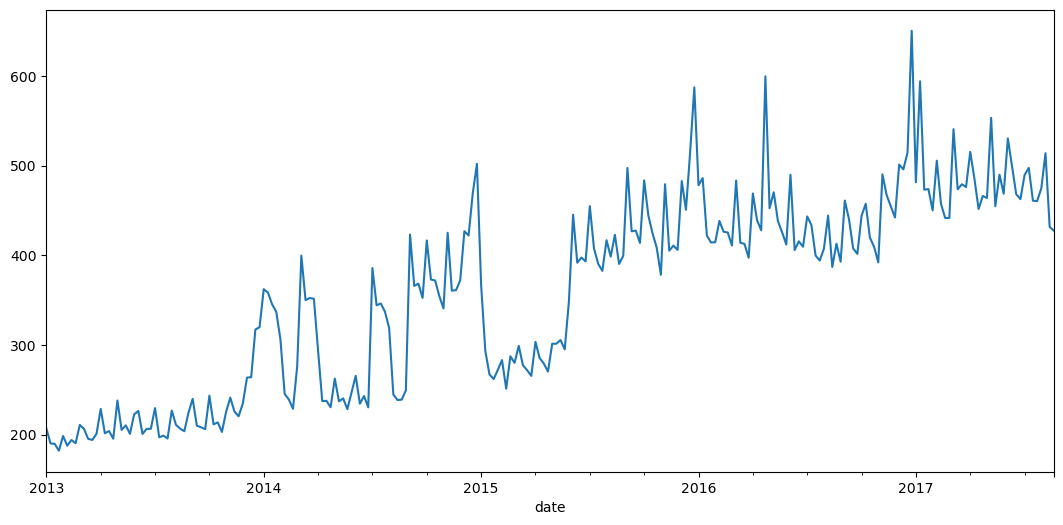

<Figure size 2000x1000 with 0 Axes>

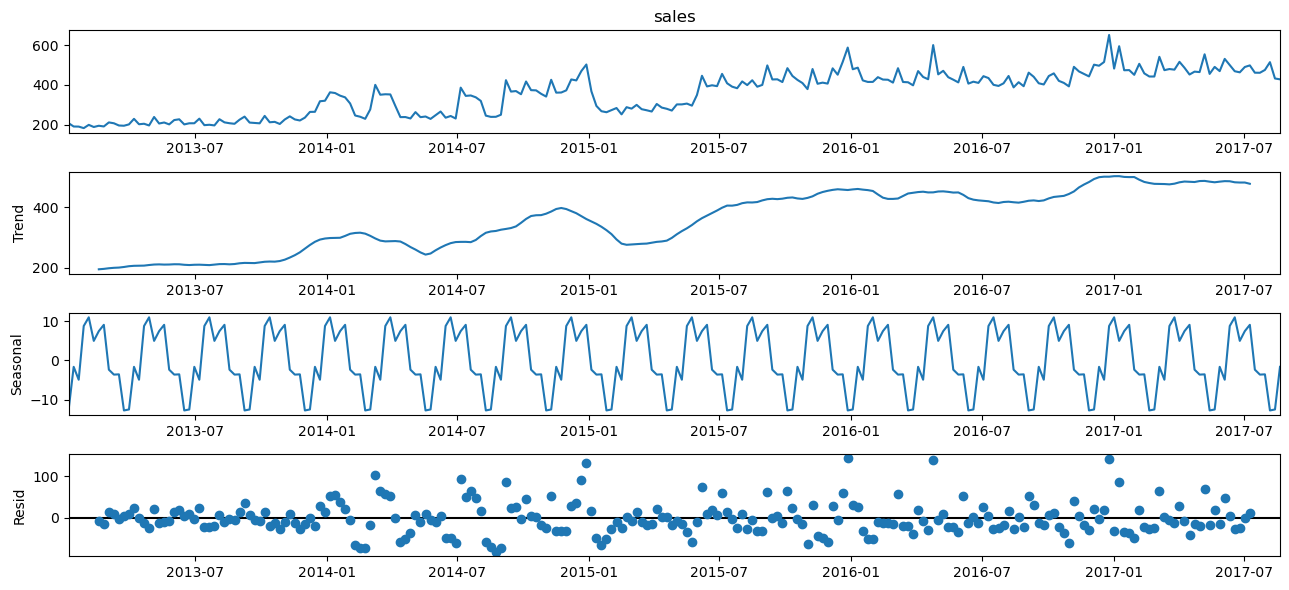

In [83]:
df_w=df.resample('W').mean()
df_w['sales'].plot()

plt.figure(figsize=(20,10))
decompose_ts_add = seasonal_decompose(df_w.sales,period=12) #period 12 is 
decompose_ts_add.plot()
plt.show()

# Monthly data smoothing

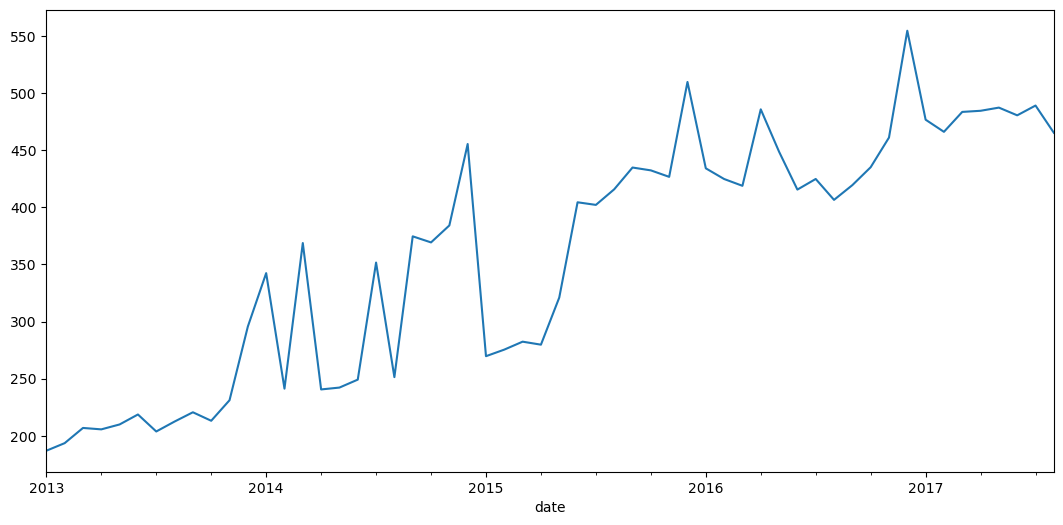

<Figure size 2000x1000 with 0 Axes>

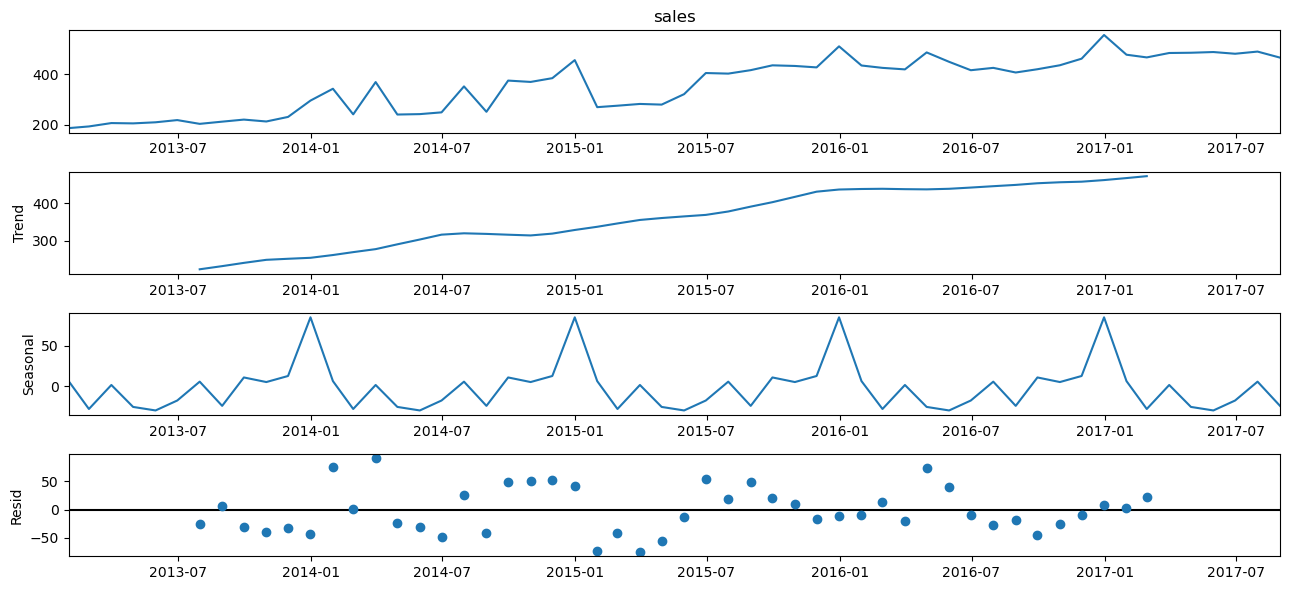

In [84]:
df_m=df.resample('M').mean()
df_m['sales'].plot()

plt.figure(figsize=(20,10))
decompose_ts_add = seasonal_decompose(df_m.sales,period=12) #period 12 is 
decompose_ts_add.plot()
plt.show()

# Quaterly smoothning

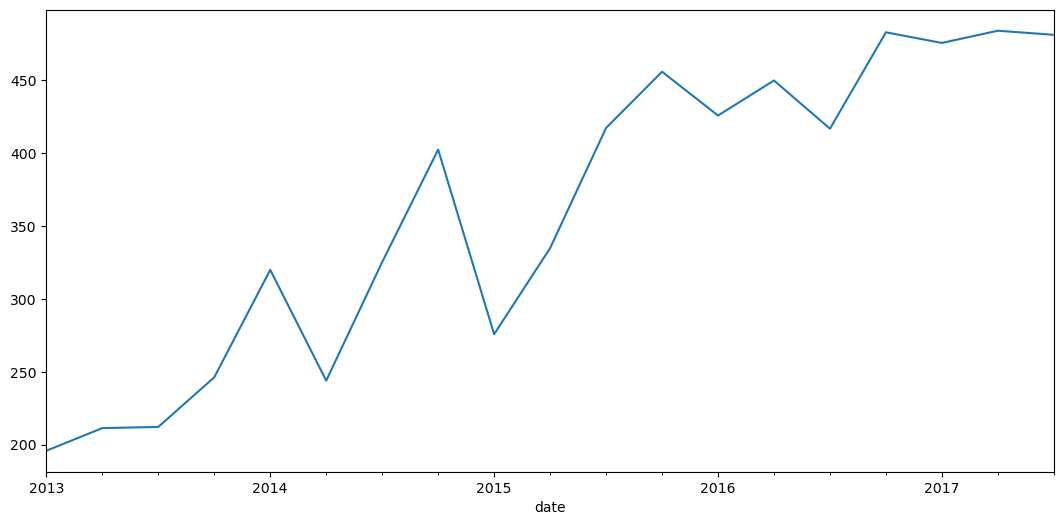

<Figure size 2000x1000 with 0 Axes>

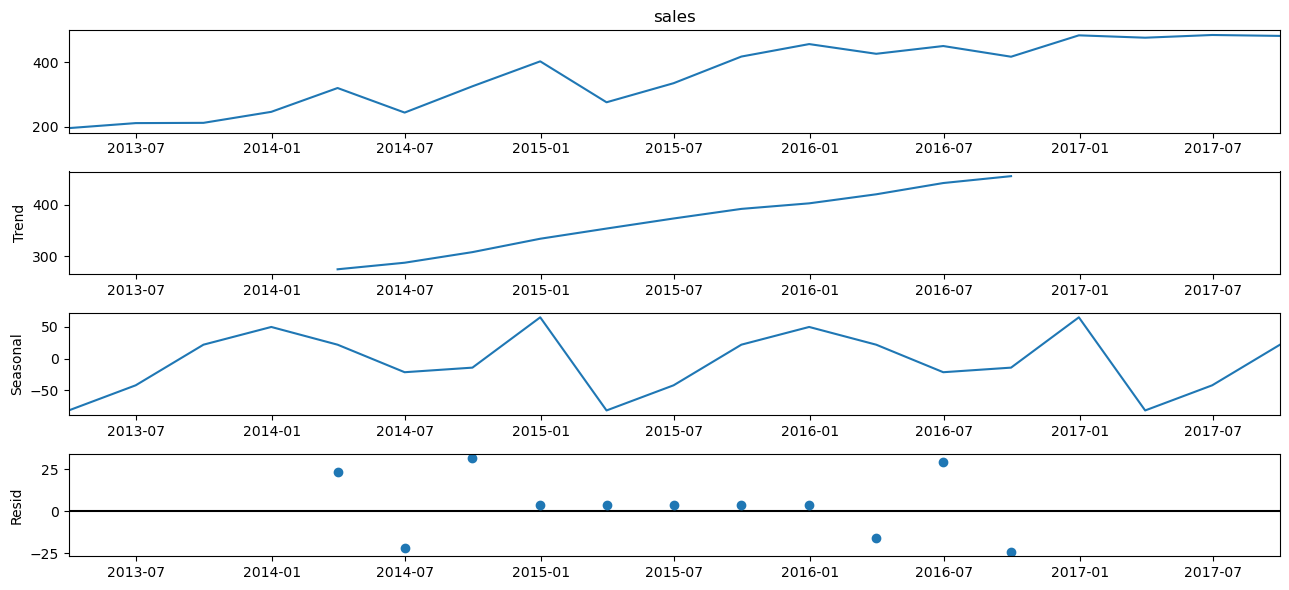

In [85]:
df_q=df.resample('Q').mean()
df_q['sales'].plot()

plt.figure(figsize=(20,10))
decompose_ts_add = seasonal_decompose(df_q.sales,period=8) 
decompose_ts_add.plot()
plt.show()

# Annual smoothning

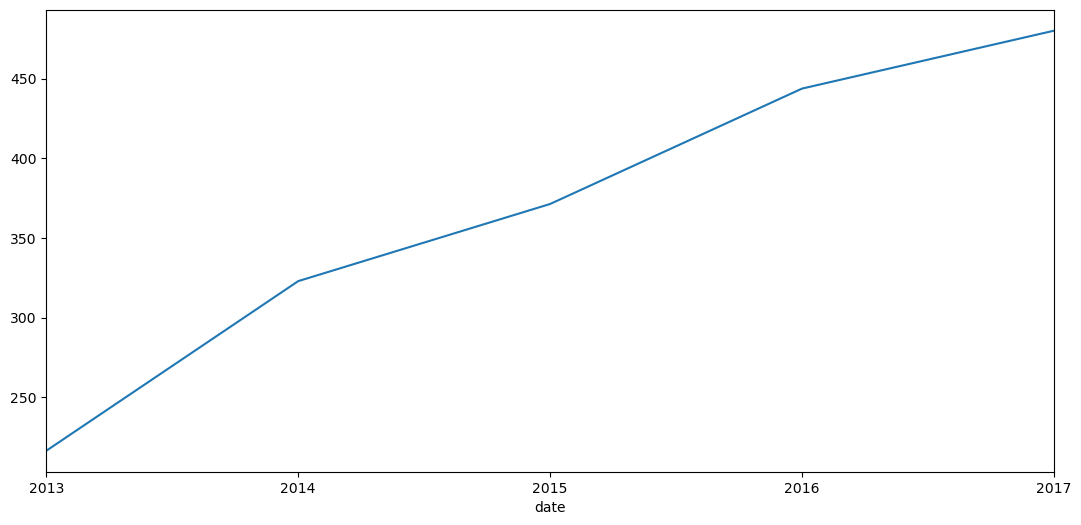

<Figure size 2000x1000 with 0 Axes>

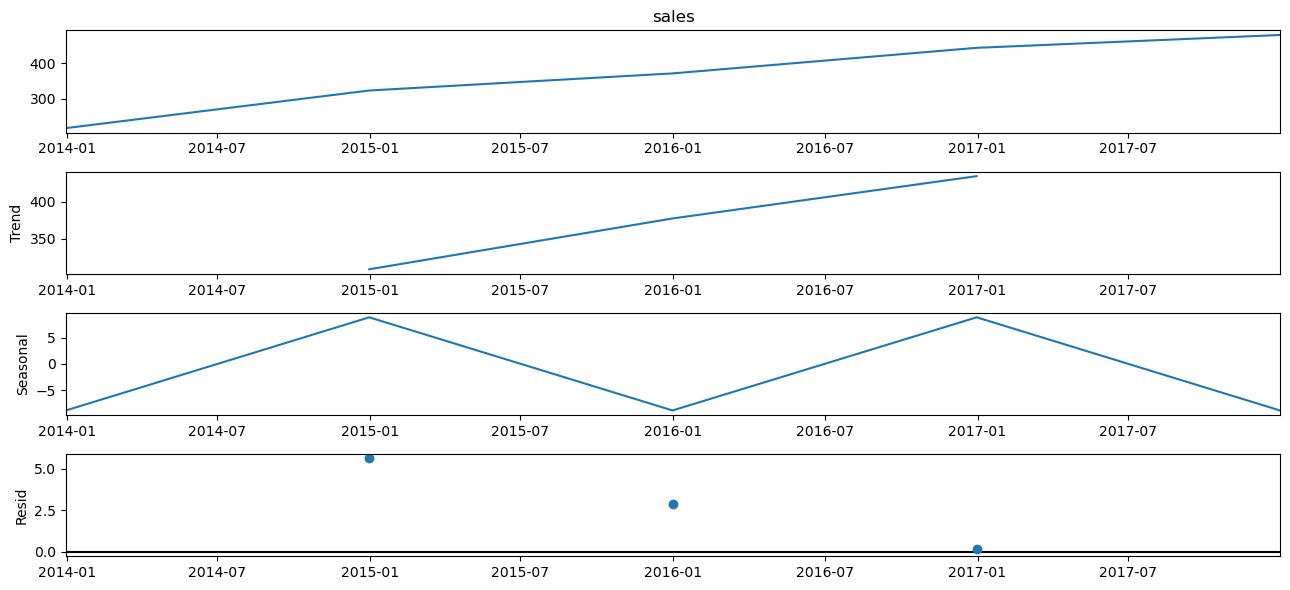

In [86]:
df_y=df.resample('A').mean()
df_y['sales'].plot()

plt.figure(figsize=(20,10))
decompose_ts_add = seasonal_decompose(df_y.sales,period=2) 
decompose_ts_add.plot()
plt.show()

# Checking for the stationarity of the data

In [87]:
from statsmodels.tsa.stattools import adfuller

In [88]:
print("Observations of Dickey-fuller test")
Adf_test = adfuller(df_w['sales'],autolag='AIC')
Adf_output=pd.Series(Adf_test[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])

Observations of Dickey-fuller test


In [89]:
Adf_output

Test Statistic                  -1.590375
p-value                          0.488427
#lags used                       9.000000
number of observations used    232.000000
dtype: float64

In [90]:
def check_stationarity(data_column):
    result = adfuller(data_column)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] <= 0.05:
        print("The data is likely stationary.")
    else:
        print("The data is likely non-stationary.")

In [91]:
check_stationarity(df_w['sales'])

ADF Statistic: -1.590374702760456
p-value: 0.4884268106268138
Critical Values: {'1%': -3.458854867412691, '5%': -2.8740800599399323, '10%': -2.573453223097503}
The data is likely non-stationary.


In [92]:
data=df_w[["sales"]]
data

sales
date                  
2013-01-06  206.843478
2013-01-13  190.285220
2013-01-20  189.835452
2013-01-27  182.152050
2013-02-03  198.564267
...                ...
2017-07-23  460.504663
2017-07-30  474.732392
2017-08-06  513.884368
2017-08-13  431.730145
2017-08-20  427.492801

[242 rows x 1 columns]

In [93]:
# Determine train and test set boundaries
total_data_points = len(data)
test_set_boundary = df_w.index.max() - pd.DateOffset(years=1)  # Last year of data as test set boundary

# Split data into train and test sets
train_set = df_w.loc[df_w.index <= test_set_boundary]
test_set = df_w.loc[df_w.index > test_set_boundary]

# Optionally, reset the index if needed
# Check the shapes of train and test sets
print("Train set shape:", train_set.shape)
print("Test set shape:", test_set.shape)

Train set shape: (189, 4)
Test set shape: (53, 4)


<Axes: xlabel='date'>

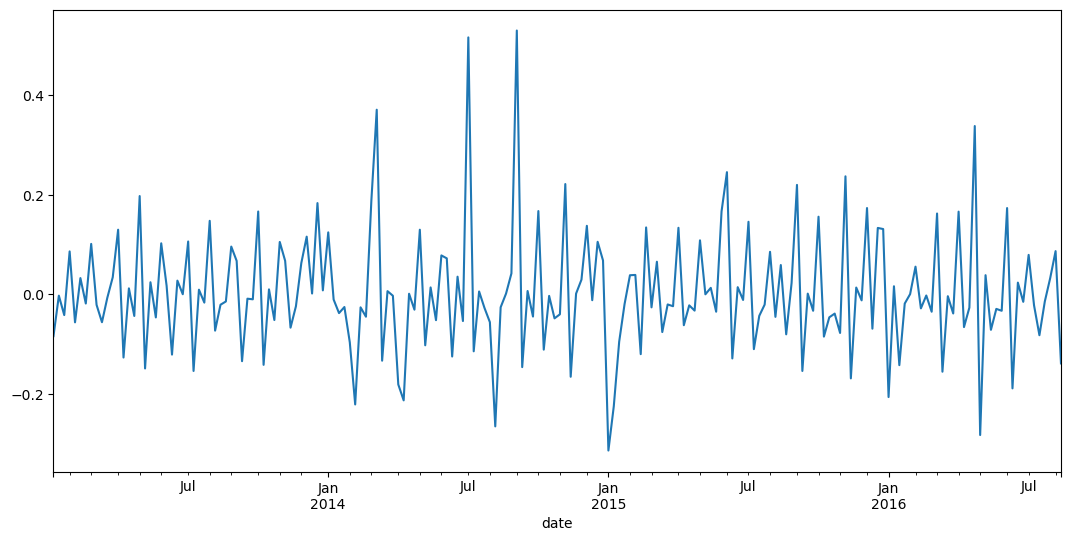

In [94]:
data_log_tr= np.log(train_set['sales'])
data_log_diff_tr=data_log_tr- data_log_tr.shift()
data_log_diff_tr.dropna().plot()

<Axes: xlabel='date'>

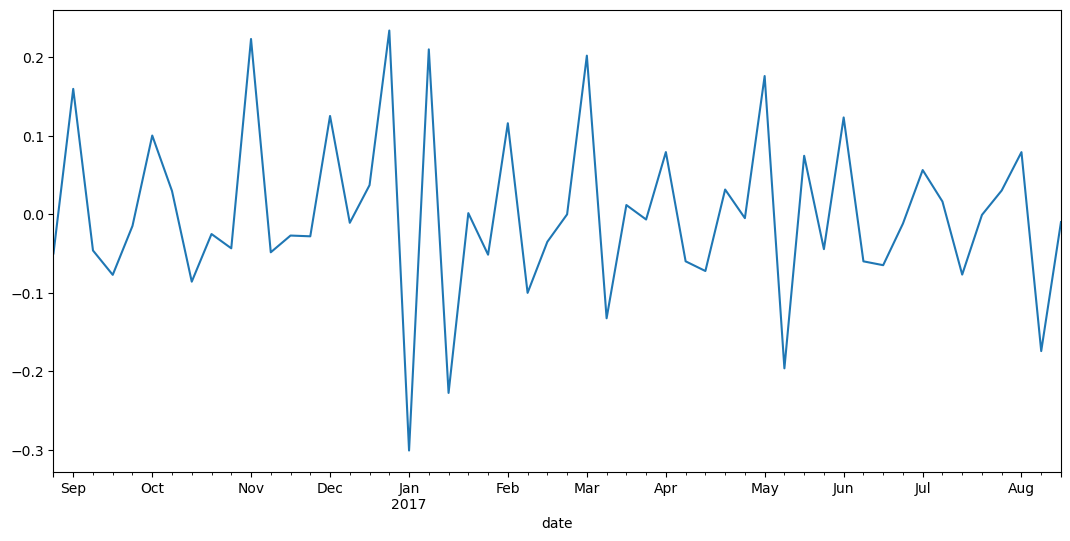

In [95]:
data_log_te= np.log(test_set['sales'])
data_log_diff_te=data_log_te- data_log_te.shift()
data_log_diff_te.dropna().plot()

In [96]:
data_transformed=data_log_diff_tr.dropna()

In [97]:
result=adfuller (data_transformed)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -4.177974
p-value: 0.000718
Critical values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


In [98]:
#checking if data is stationary using tsa plots

In [99]:
import statsmodels.graphics.tsaplots as tsa_plots

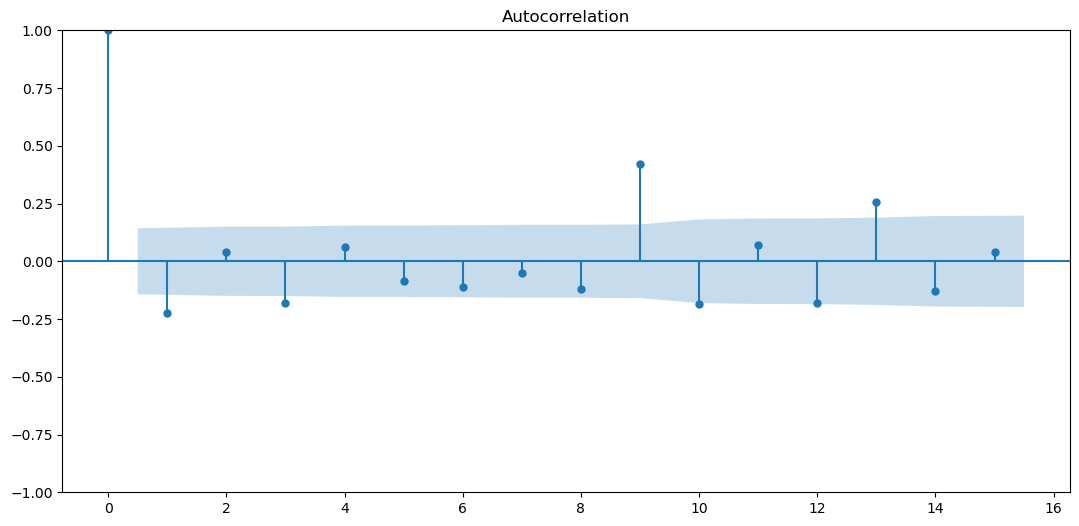

In [100]:
tsa_plots.plot_acf(data_log_diff_tr.dropna(),lags=15)
#tsa_plots.plot_pacf(data.Close,lags=20)
plt.show()

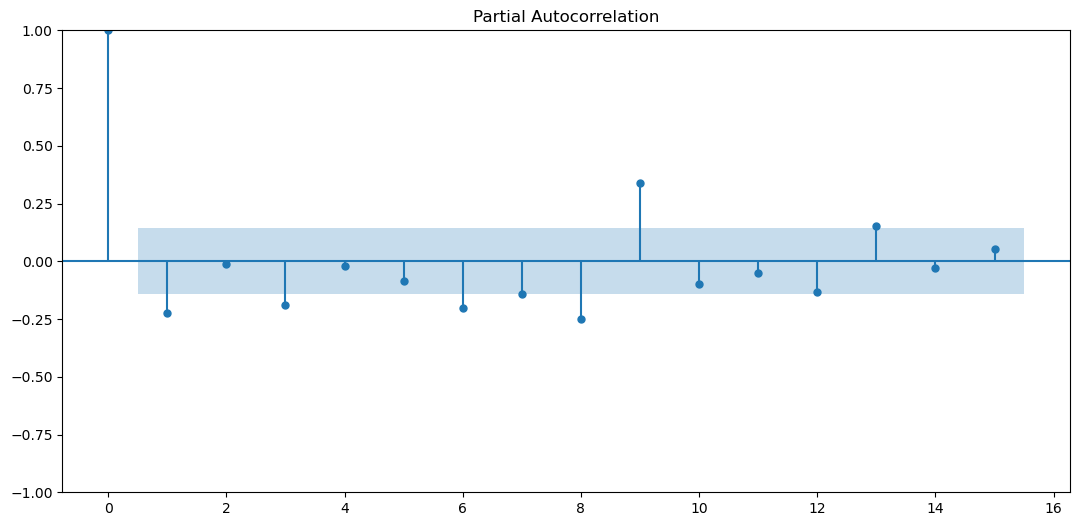

In [101]:
tsa_plots.plot_pacf(data_log_diff_tr.dropna(),lags=15)
plt.show()

In [102]:
train_set.drop(['store_nbr','onpromotion'], inplace=True, axis=1)

In [103]:
test_set.drop(['store_nbr','onpromotion'], inplace=True, axis=1)

In [108]:
train_set.drop(columns = 'id',axis=1,inplace=True)

#  Applying various models on the data

## ARIMA Model

In [109]:
from statsmodels.tsa.arima.model import ARIMA

In [110]:
arima_model = ARIMA(train_set,order=(1,1,1))
arima_model_fit = arima_model.fit()

In [111]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  189
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -965.766
Date:                Wed, 13 Sep 2023   AIC                           1937.532
Time:                        06:12:08   BIC                           1947.241
Sample:                    01-06-2013   HQIC                          1941.466
                         - 08-14-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5242      0.101      5.181      0.000       0.326       0.723
ma.L1         -0.8422      0.070    -12.045      0.000      -0.979      -0.705
sigma2      1692.8273    108.566     15.593      0.000    1480.043    1905.612
===================================================================================
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):               112.81
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               3.28   Skew:                             1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [112]:
arima_model_fit.fittedvalues

date
2013-01-06      0.000000
2013-01-13    206.757891
2013-01-20    193.781929
2013-01-27    192.658127
2013-02-03    186.498494
                 ...    
2016-07-17    434.897201
2016-07-24    411.545997
2016-07-31    405.895024
2016-08-07    413.028330
2016-08-14    437.347477
Freq: W-SUN, Length: 189, dtype: float64

In [113]:
arima_predicted = arima_model_fit.predict(start=len(train_set), end=len(train_set)+len(test_set)-1, type='levels')
arima_predicted.index=test_set.index

In [114]:
arima_predicted.head()

date
2016-08-21    399.370934
2016-08-28    405.819043
2016-09-04    409.199222
2016-09-11    410.971154
2016-09-18    411.900023
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [115]:
arima_rmse = np.sqrt(np.mean((arima_predicted - test_set['sales'].values)**2))
arima_rmse

75.18734196309735

In [116]:
arima_mape = np.round(np.mean(np.abs((test_set['sales'].values-arima_predicted) / test_set['sales'].values))*100,2)
arima_mape

12.34

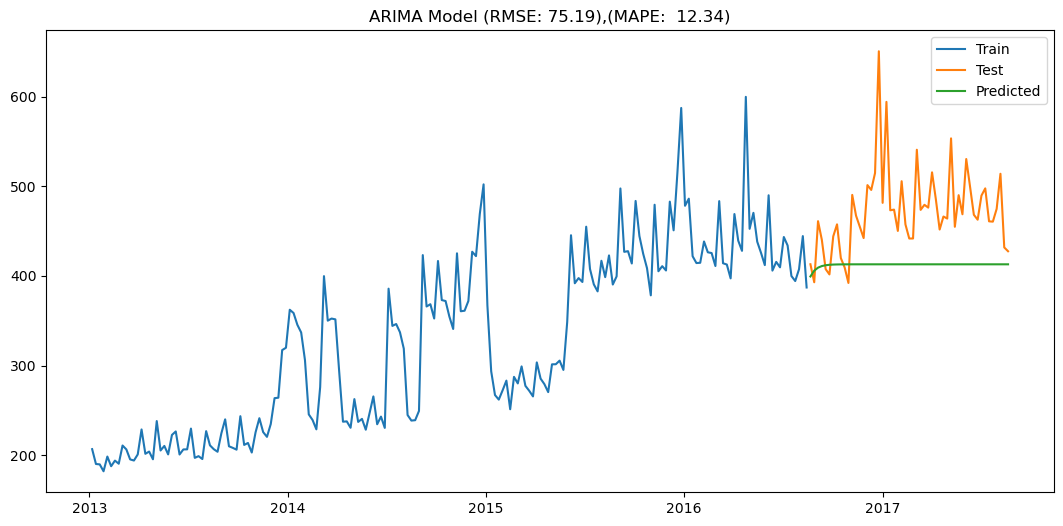

In [117]:
plt.plot(train_set['sales'], label='Train')
plt.plot(test_set['sales'], label='Test')
plt.plot(test_set.index, arima_predicted, label='Predicted')
plt.title(f'ARIMA Model (RMSE: {arima_rmse:.2f}),(MAPE: {arima_mape: .2f})')
plt.legend()
plt.show()

## SARIMA Model

In [118]:
import statsmodels.api as sm

In [119]:
sarima_model = sm.tsa.SARIMAX(train_set['sales'], order=(2,1,0), seasonal_order=(1,1,1,66))
sarima_model_fit = sarima_model.fit()
sarima_model_fit.summary()

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                sales   No. Observations:                  189
Model:             SARIMAX(2, 1, 0)x(1, 1, [1], 66)   Log Likelihood                -663.582
Date:                              Wed, 13 Sep 2023   AIC                           1337.164
Time:                                      06:12:44   BIC                           1351.184
Sample:                                  01-06-2013   HQIC                          1342.858
                                       - 08-14-2016                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4013      0.088     -4.538      0.000      -0.575      -0.228
ar.L2         -0.0426      0.104     -0.411      0.681      -0.246       0.161
ar.S.L66      -0.6718     73.555     -0.009      0.993    -144.837     143.493
ma.S.L66       0.1289    114.365      0.001      0.999    -224.022     224.280
sigma2      2445.1256   2.53e+04      0.097      0.923    -4.7e+04    5.19e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                26.18
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                             0.55
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [120]:
sarima_predicted = sarima_model_fit.predict(start=len(train_set['sales']), end=len(train_set['sales'])+len(test_set['sales'])-1)
sarima_predicted.index=test_set.index

In [121]:
sarima_rmse = np.sqrt(np.mean((sarima_predicted - test_set['sales'].values)**2))
sarima_rmse

66.45696513238613

In [122]:
sarima_mape = np.round(np.mean(np.abs((test_set['sales'].values-sarima_predicted) / test_set['sales'].values))*100,2)
sarima_mape

10.47

In [123]:
sarima_predicted.head()

date
2016-08-21    367.643455
2016-08-28    355.554049
2016-09-04    372.475502
2016-09-11    439.857713
2016-09-18    490.551137
Freq: W-SUN, Name: predicted_mean, dtype: float64

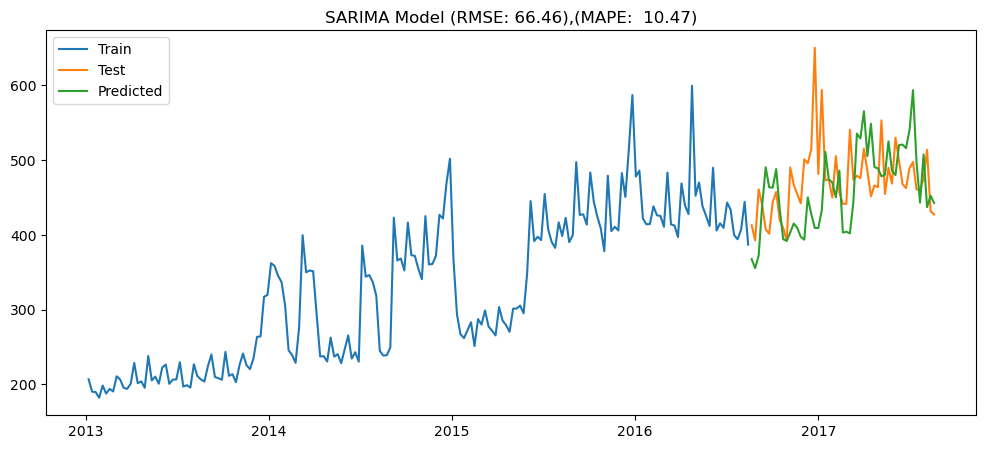

In [124]:
plt.figure(figsize=(12,5))
plt.plot(train_set['sales'], label='Train')
plt.plot(test_set['sales'], label='Test')
plt.plot(sarima_predicted, label='Predicted')
plt.title(f'SARIMA Model (RMSE: {sarima_rmse:.2f}),(MAPE: {sarima_mape: .2f})')
plt.legend()
plt.show()

## Triple Exponential Smoothing Model

In [125]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [126]:
TES_model = ExponentialSmoothing(train_set['sales'], trend='add', seasonal='add', seasonal_periods=12)
TES_model_fit = TES_model.fit()

In [127]:
TES_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                    sales   No. Observations:                  189
Model:             ExponentialSmoothing   SSE                         322469.447
Optimized:                         True   AIC                           1438.541
Trend:                         Additive   BIC                           1490.409
Seasonal:                      Additive   AICC                          1442.565
Seasonal Periods:                    12   Date:                 Wed, 13 Sep 2023
Box-Cox:                          False   Time:                         06:12:46
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6311404                alpha                 True
smoothing_trend               0.0032531                 beta                 True
smoothing_seasonal            0.0231377                gamma                 True
initial_level                 194.84427                  l.0                 True
initial_trend                 1.6374327                  b.0                 True
initial_seasons.0            -10.720087                  s.0                 True
initial_seasons.1             0.2030169                  s.1                 True
initial_seasons.2            -2.9768555                  s.2                 True
initial_seasons.3             3.0282598                  s.3                 True
initial_seasons.4             15.274763                  s.4                 True
initial_seasons.5            -1.1592421                  s.5                 True
initial_seasons.6             7.5918661                  s.6                 True
initial_seasons.7             10.236299                  s.7                 True
initial_seasons.8            -4.4725346                  s.8                 True
initial_seasons.9            -4.4590512                  s.9                 True
initial_seasons.10           -2.7604482                 s.10                 True
initial_seasons.11           -9.1056524                 s.11                 True
---------------------------------------------------------------------------------
"""

In [130]:
TES_predicted = TES_model_fit.predict(start=len(train_set['sales']), end=len(train_set['sales'])+len(test_set['sales'])-1)
TES_predicted.index=test_set.index

In [131]:
TES_rmse = np.sqrt(np.mean((TES_predicted - test_set['sales'].values)**2))
TES_rmse

56.803884276735936

In [132]:
TES_mape = np.round(np.mean(np.abs((test_set['sales'].values-TES_predicted) / test_set['sales'].values))*100,2)
TES_mape

7.9

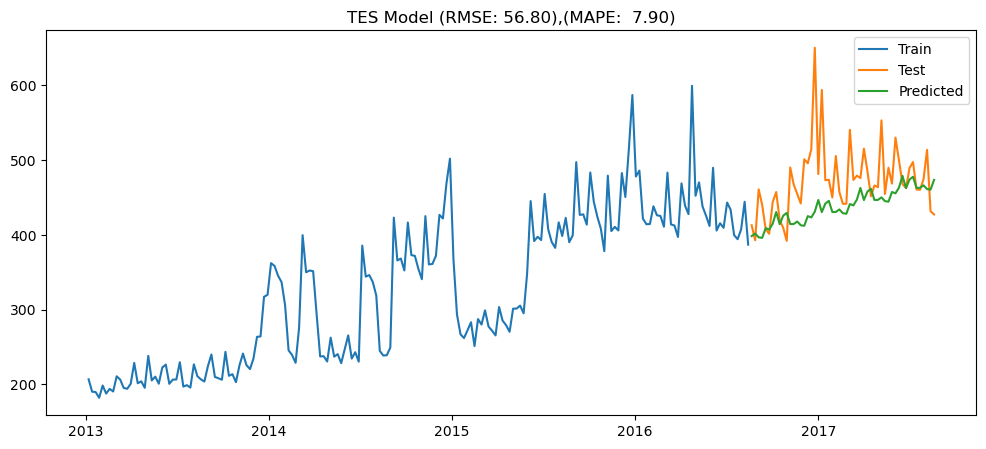

In [133]:
plt.figure(figsize=(12,5))
plt.plot(train_set['sales'], label='Train')
plt.plot(test_set['sales'], label='Test')
plt.plot(TES_predicted, label='Predicted')
plt.title(f'TES Model (RMSE: {TES_rmse:.2f}),(MAPE: {TES_mape: .2f})')
plt.legend()
plt.show()

## TBATS Model

In [134]:
from tbats import BATS,TBATS

In [135]:
estimator_TBATS = TBATS(seasonal_periods= [12,52],use_trend=True)
fitted_model_TBATS = estimator_TBATS.fit(train_set['sales'])

In [136]:
y_TBATS = fitted_model_TBATS.forecast(steps = 53)

In [137]:
TBATS_rmse = np.sqrt(np.mean((y_TBATS- test_set['sales'].values)**2))
TBATS_rmse

71.98687831063735

In [138]:
TBATS_mape = np.round(np.mean(np.abs((test_set['sales'].values-y_TBATS) / test_set['sales'].values))*100,2)
TBATS_mape

11.63

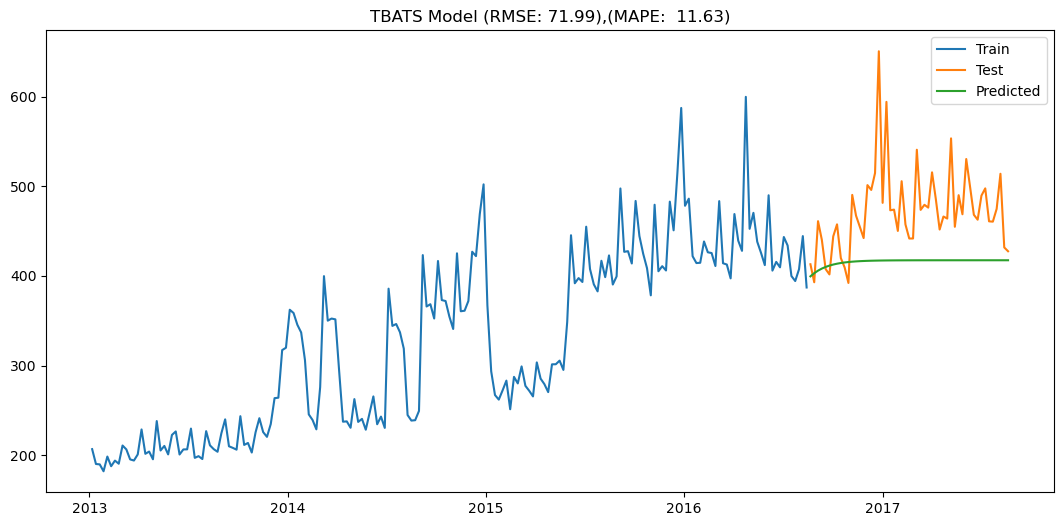

In [139]:
plt.plot(train_set['sales'], label='Train')
plt.plot(test_set['sales'], label='Test')
plt.plot(test_set.index, y_TBATS, label='Predicted')
plt.title(f'TBATS Model (RMSE: {TBATS_rmse:.2f}),(MAPE: {TBATS_mape: .2f})')
plt.legend()
plt.show()

## BATS Model

In [140]:
estimator_BATS = BATS(seasonal_periods= [12,52])
fitted_model_BATS = estimator_BATS.fit(train_set['sales'])

In [141]:
y_BATS = fitted_model_BATS.forecast(steps = 53)

In [142]:
BATS_rmse = np.sqrt(np.mean((y_BATS- test_set['sales'].values)**2))
BATS_rmse

41.31384462788673

In [143]:
BATS_mape = np.round(np.mean(np.abs((test_set['sales'].values-y_BATS) / test_set['sales'].values))*100,2)
BATS_mape

6.64

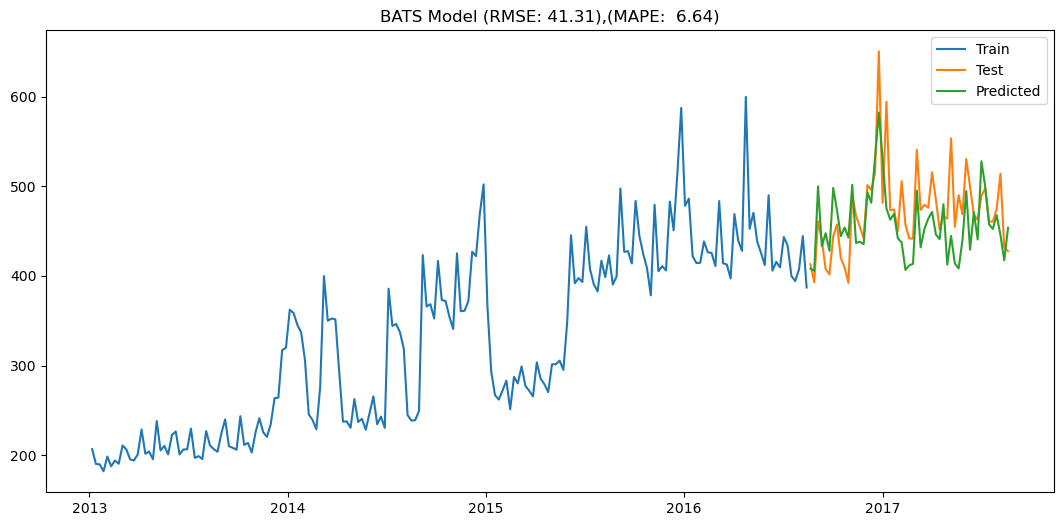

In [144]:
plt.plot(train_set['sales'], label='Train')
plt.plot(test_set['sales'], label='Test')
plt.plot(test_set.index, y_BATS, label='Predicted')
plt.title(f'BATS Model (RMSE: {BATS_rmse:.2f}),(MAPE: {BATS_mape: .2f})')
plt.legend()
plt.show()

- After comparing all the rmse and mape values we are choosing BATS model for the deployment because BATS model has lowest rmse and mape values.

# Creating Pickle file for model deployment

In [145]:
import pickle
filename = 'Forcasting.pkl'
pickle.dump(fitted_model_BATS, open(filename,'wb'))
model=pickle.load(open('Forcasting.pkl','rb'))